In [3]:
import numpy as np # this provides the linear algebra content
import pandas as pd #allows for data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import os

In [4]:
df = pd.read_csv("BlackFriday.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


##### Inevitably, after seeing the preliminary measures (info, head, tail, summary stats), it's time to start doing the following:

• asking the interesting questions that randomly come to head

•  It's also a good idea to check the domain knowledge that's out there so you're familiar with terms/jargon commonly used in the industry your dataset comes from

• think of interesting use cases for the data set (leads to best insight, etc.)

##### Some questions the original author thought of were the following:

• Who is more likely to spend more in a Black Friday sale? 

• Men or Women?

• Married or Unmarried people?

• Old residents or new residents?

• Which type of products are more likely to be sold in a sale like Black friday?

• Which type of products are common among men and which among women?

##### Prediction/classification:

• Predict the gender of a customer based on the rest of the data

• Predict the amount of a purchase based on the rest data.

##### Recommendation: 

• Suggest some products based on age

• Suggest some products based on location/regions customers belong to

• Suggest products based on the gender of the customer

Without EDA and DV, we can't tell if the given data will hlep with these use cases. We can only tell if the relevant columns have a correlation, those will be helpful to predict/conclude the cases.

Plotting is an obvious next step, though, it's a bit wise to clean up the null values first. 

In [9]:
df.isnull().any()
## therefore PC2 and PC3 have some null values
## time to check for their unique values and assign a default value for NaNs

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [10]:
print('Product_Category_2', df['Product_Category_2'].unique())

print('-----------------------------')
print('Product_Category_3', df['Product_Category_3'].unique())

Product_Category_2 [ nan   6.  14.   2.   8.  15.  16.  11.   5.   3.   4.  12.   9.  10.  17.
  13.   7.  18.]
-----------------------------
Product_Category_3 [ nan  14.  17.   5.   4.  16.  15.   8.   9.  13.   6.  12.   3.  18.  11.
  10.]


In [11]:
## All values are in the integer range. Perhaps I can assign 0 for NaN cases
df.fillna(value=0, inplace = True)

## Looks like product categories are float while they can be int; change that
df["Product_Category_2"] = df["Product_Category_2"].astype(int)
df["Product_Category_3"] = df["Product_Category_3"].astype(int)
print('Product_Category_2', df['Product_Category_2'].unique())
print('------------------------------------------------------')
print('Product_Category_3', df['Product_Category_3'].unique())

Product_Category_2 [ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]
------------------------------------------------------
Product_Category_3 [ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]


In [15]:
## We might not need product ID and user ID hence dropping them
df.drop(columns = ["User_ID", "Product_ID"], inplace=True)
## need to always remember to use inplace to make the changes in current data frame

TypeError: drop() got an unexpected keyword argument 'columns'

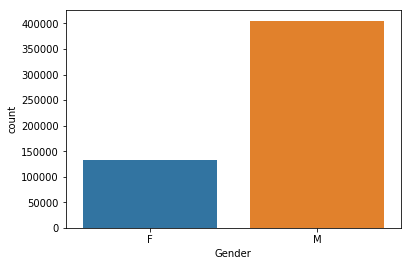

In [18]:
sns.countplot(df['Gender'])
plt.show()

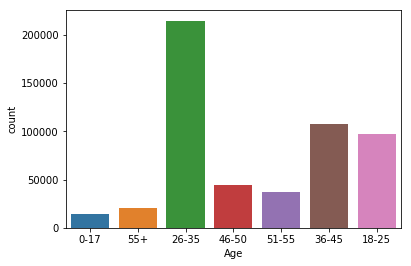

In [19]:
sns.countplot(df['Age'])
plt.show()
# Now, on the plotting a count plot for age, seems like the majority 
# of the population in the ages group 26-35 attended the sale.

We could take this further. How many of these males were married? For this, the instructions are to make a column that shows gender+married status and uses it as a hue.

In [30]:
df['combined_G_M'] = df.apply(lambda x:'%s_%s' %
                             (x['Gender'],x['Marital_Status']), axis=1)
print(df['combined_G_M'].unique())

## what are lambdas used for again?

['F_0' 'M_0' 'M_1' 'F_1']


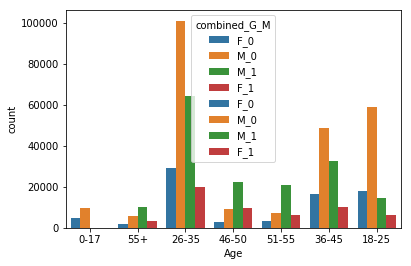

In [32]:
sns.countplot(df['Age'], hue=df['combined_G_M'])
plt.show()

No bars for married in the range of 0-17 which is sensible, lest we consider arranged marriages in the teens. On the other hand, ages 46 and above groups, females are much less. Then, married males paying in range 46-55 are also comparaitively more than married females. Therefore, it could also imply that although ladies do shop a lot, their spouses are possibly paying for it and hence data reflects that men shopped more. If we had more categorical data defining what kind of products were purchased by men, we could dig in this statement further. Notice, since in this dataset we don't know if there is a category that implies feminine products/clothes, we cannot further eplore this case.

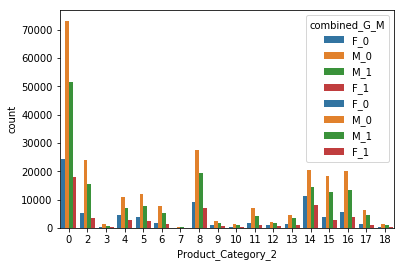

In [35]:
sns.countplot(df['Product_Category_2'], hue=df['combined_G_M'])
plt.show()

Even below plots don't really show any hint of whether some products are particularly being purchased by either females or married males.

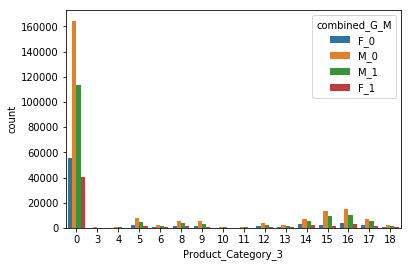

In [36]:
sns.countplot(df['Product_Category_3'], hue=df['combined_G_M'])
plt.show()

In [37]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'combined_G_M'],
      dtype='object')

In [38]:
df_by_occupation_and_categories = df.groupby(['Occupation', 'Product_Category_1']).count().reset_index('Product_Category_1')

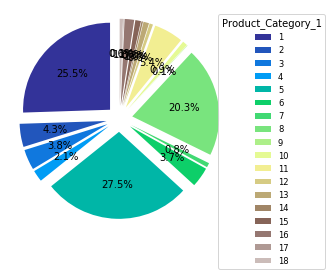

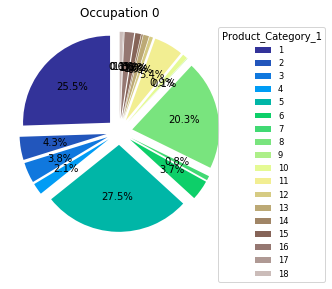

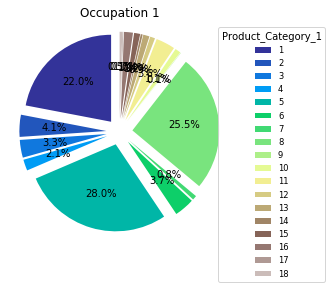

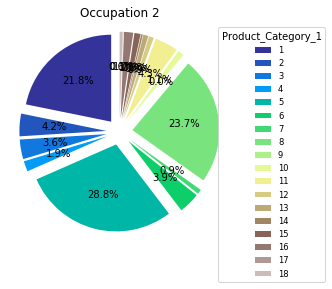

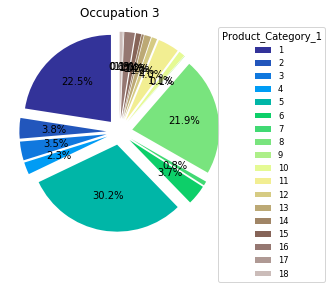

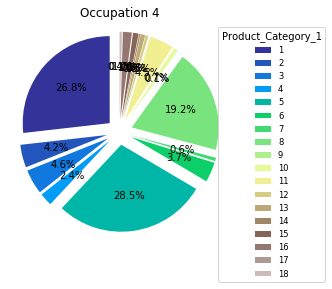

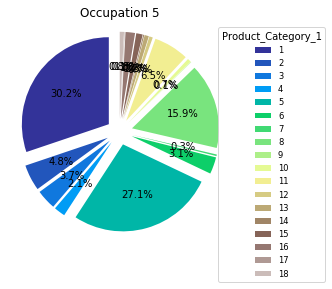

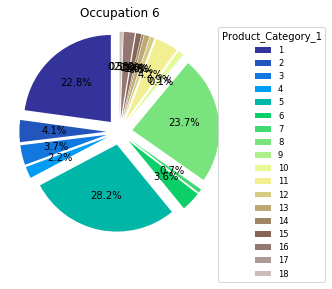

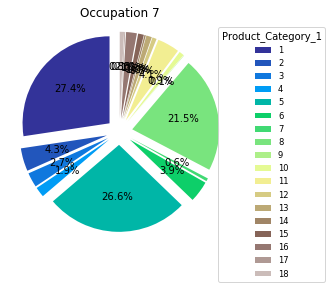

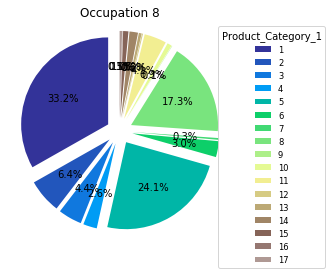

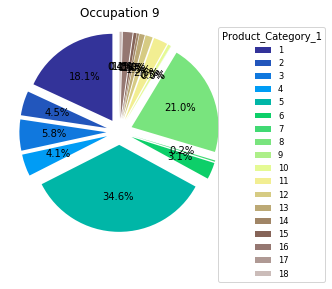

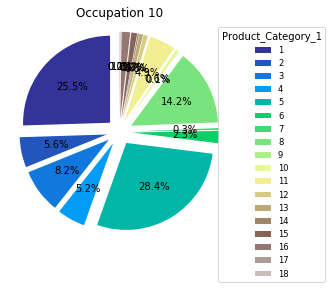

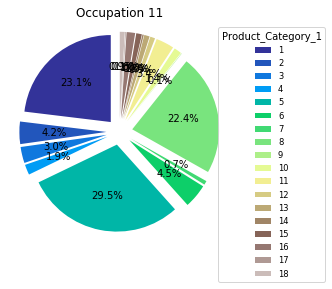

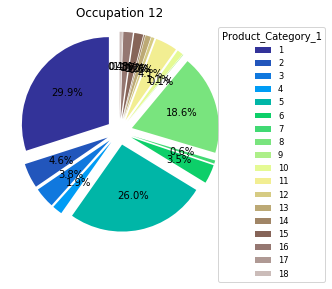

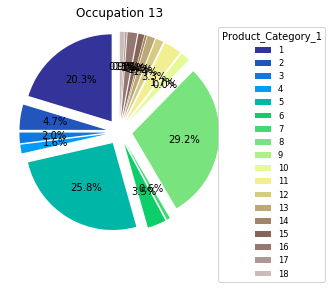

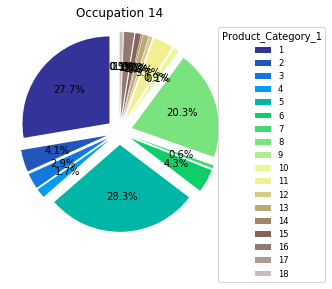

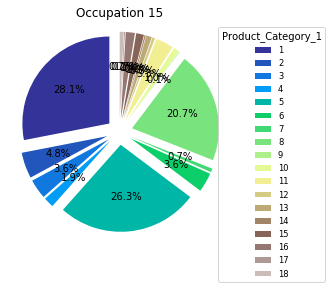

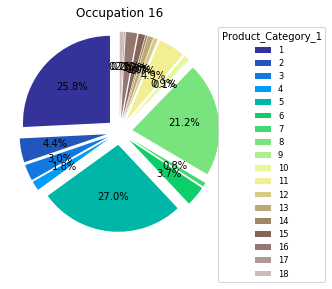

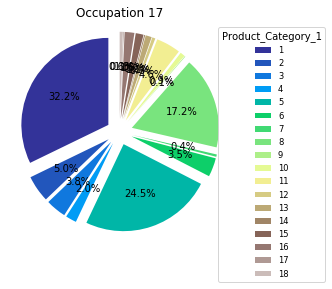

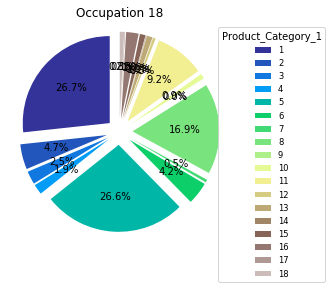

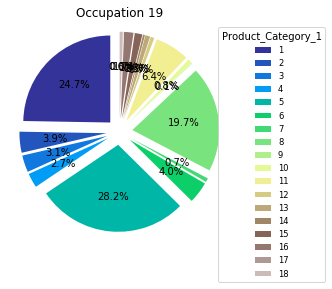

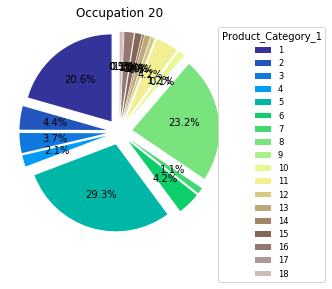

In [40]:
fig = plt.figure()
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')
cmap = plt.get_cmap('terrain')
colors = [cmap(i) for i in np.linspace(0, 1, 20)]
plotFor = "Occupation {0}"
title = 'Product_Category_1'
for i in range(21):
    explode = [0.15 for i in range(len(df_by_occupation_and_categories['Gender'][i].get_values()))]
    a = plt.pie(df_by_occupation_and_categories['Gender'][i].get_values(), radius=1, colors=colors,startangle=90,autopct='%1.1f%%',explode=explode)
    plt.legend(df_by_occupation_and_categories['Product_Category_1'][0].get_values(),loc='upper center',prop=fontP, bbox_to_anchor=(1.2, 1),title=title)
    plt.title(plotFor.format(i))
    plt.show()
## We can use tableau as well to create better charts.